In [1]:
import pycaret
import pandas as pd

train_path = './Datasets/SMOTE_train.csv'
f = pd.read_csv(train_path)
f

,X01,X02,X03,X04,X05,X06,X07,X08,X09,X10,...,X20,X21,X22,X23,X24,day,hour,minute,dayofweek,Y
0,41.830000,124.940000,263.220000,300.570000,10.350000,10.390000,10.320000,90.280000,261.760000,26.720000,...,0.050000,10.350000,7.930000,78.010000,358689.000000,1.000000,0.000000,0.000000,0.000000,3.0
1,41.970000,125.300000,262.120000,300.530000,10.330000,10.400000,10.340000,89.500000,268.510000,26.840000,...,0.000000,9.670000,7.970000,78.080000,339139.000000,1.000000,0.000000,6.000000,0.000000,3.0
2,41.900000,125.000000,261.450000,300.290000,10.350000,10.410000,10.330000,89.740000,263.780000,25.930000,...,0.000000,9.680000,7.980000,79.500000,326082.000000,1.000000,0.000000,12.000000,0.000000,3.0
3,42.330000,125.250000,262.120000,298.940000,10.310000,10.410000,10.330000,89.690000,260.090000,27.340000,...,5.280000,10.920000,7.950000,80.070000,321295.000000,1.000000,0.000000,18.000000,0.000000,3.0
4,42.370000,125.030000,262.940000,301.730000,10.330000,10.400000,10.320000,90.200000,262.260000,41.930000,...,4.600000,11.120000,7.940000,79.960000,339248.000000,1.000000,0.000000,24.000000,0.000000,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40970,43.346764,125.036363,269.610982,309.209921,10.220581,10.033126,10.593928,182.196646,429.104485,23.927271,...,125.044389,61.693883,7.793236,82.367251,294572.086391,11.098193,2.029065,20.116259,0.676355,5.0
40971,42.170480,125.165508,261.163936,296.487556,10.494880,10.330776,11.129168,183.044165,782.279241,34.456380,...,234.104861,169.421216,7.963900,87.653720,277259.282800,24.014800,16.878000,32.839200,4.473200,5.0
40972,40.287755,124.888282,257.220451,295.181205,10.234978,10.107489,10.948326,177.293830,668.303399,31.501940,...,7.093171,102.902723,7.865022,80.456963,262020.896724,28.000000,20.000000,11.497780,6.000000,5.0
40973,41.759158,124.864466,264.684261,301.104574,10.595216,10.458480,11.121632,158.025924,776.489704,41.102043,...,477.754196,347.139393,7.606417,52.348249,292126.369087,22.836756,12.424024,12.326488,4.027207,5.0


In [8]:
f.Y.value_counts()

4.0    8195
2.0    8195
5.0    8195
3.0    8195
1.0    8195
Name: Y, dtype: int64

In [2]:
from pycaret.classification import *
exp = setup(f, target = 'Y', session_id=123, train_size = 0.9, normalize = True, feature_selection=True,feature_selection_threshold=0.7)

,Description,Value
0,session_id,123
1,Target,Y
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(40975, 29)"
5,Missing Values,False
6,Numeric Features,28
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [3]:
from sklearn.metrics import log_loss
add_metric('logloss', 'LogLoss', log_loss, greater_is_better=False, target="pred_proba")

Name                                                           LogLoss
Display Name                                                   LogLoss
Score Function                   <function log_loss at 0x7f5add2c10e0>
Scorer               make_scorer(log_loss, greater_is_better=False,...
Target                                                      pred_proba
Args                                                                {}
Greater is Better                                                False
Multiclass                                                        True
Custom                                                            True
Name: logloss, dtype: object

In [5]:
mm = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,LogLoss,TT (Sec)
et,Extra Trees Classifier,0.8902,0.9822,0.8904,0.8894,0.8891,0.8628,0.8631,0.4736,2.0530
rf,Random Forest Classifier,0.8720,0.9780,0.8722,0.8712,0.8707,0.8400,0.8404,0.5402,5.1580
lightgbm,Light Gradient Boosting Machine,0.7748,0.9507,0.7748,0.7790,0.7715,0.7185,0.7208,0.6798,2.5190
knn,K Neighbors Classifier,0.7708,0.9385,0.7713,0.7633,0.7631,0.7136,0.7154,1.9768,2.5660
dt,Decision Tree Classifier,0.7228,0.8268,0.7230,0.7216,0.7220,0.6535,0.6536,9.5729,0.6940
gbc,Gradient Boosting Classifier,0.5992,0.8687,0.5991,0.5959,0.5930,0.4989,0.5008,1.0792,50.7550
qda,Quadratic Discriminant Analysis,0.4338,0.7439,0.4343,0.4379,0.4225,0.2925,0.2972,1.8350,0.0440
ada,Ada Boost Classifier,0.4291,0.7478,0.4292,0.4227,0.4234,0.2864,0.2873,1.5932,2.1310
lr,Logistic Regression,0.3668,0.6721,0.3670,0.3539,0.3555,0.2086,0.2100,1.4655,0.1970
lda,Linear Discriminant Analysis,0.3544,0.6683,0.3546,0.3420,0.3442,0.1931,0.1943,1.4735,0.0860


In [4]:
et = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,LogLoss
0,0.8894,0.9819,0.8895,0.8886,0.8880,0.8617,0.8622,0.4827
1,0.8769,0.9788,0.8771,0.8754,0.8752,0.8461,0.8466,0.5033
2,0.8940,0.9826,0.8942,0.8936,0.8935,0.8675,0.8676,0.4771
3,0.8932,0.9823,0.8933,0.8925,0.8921,0.8665,0.8668,0.4724
4,0.8877,0.9827,0.8879,0.8869,0.8867,0.8597,0.8600,0.4571
5,0.8961,0.9839,0.8963,0.8956,0.8951,0.8702,0.8706,0.4631
6,0.8899,0.9812,0.8900,0.8892,0.8890,0.8624,0.8626,0.4786
7,0.8923,0.9845,0.8925,0.8916,0.8913,0.8654,0.8657,0.4614
8,0.8918,0.9829,0.8919,0.8908,0.8908,0.8647,0.8650,0.4656
9,0.8907,0.9817,0.8908,0.8898,0.8897,0.8634,0.8637,0.4750


In [6]:
et

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)

In [7]:
param_grid={
        'n_estimators': range(30,56,2),
        #'max_features': range(50,401,50),
        'min_samples_leaf': [1, 2,3, 4, 5],
        'min_samples_split': [1, 2, 3],
}
tune_et = tune_model(et, custom_grid = param_grid, optimize = 'LogLoss') 

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,LogLoss
0,0.8745,0.9783,0.8746,0.8737,0.8729,0.8431,0.8436,0.5335
1,0.8680,0.9760,0.8681,0.8664,0.8664,0.8349,0.8353,0.5300
2,0.8842,0.9797,0.8844,0.8835,0.8835,0.8553,0.8554,0.5034
3,0.8872,0.9798,0.8874,0.8860,0.8858,0.8590,0.8594,0.5169
4,0.8818,0.9797,0.8819,0.8809,0.8806,0.8522,0.8526,0.4982
5,0.8880,0.9807,0.8882,0.8873,0.8866,0.8600,0.8605,0.5040
6,0.8848,0.9785,0.8849,0.8840,0.8840,0.8560,0.8561,0.5233
7,0.8877,0.9814,0.8878,0.8871,0.8868,0.8596,0.8600,0.4872
8,0.8847,0.9807,0.8849,0.8836,0.8837,0.8559,0.8562,0.4793
9,0.8785,0.9785,0.8786,0.8778,0.8775,0.8481,0.8484,0.5102


In [19]:
tune_et

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=38, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)

In [20]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8723,0.9778,0.8725,0.8718,0.8708,0.8404,0.8409
1,0.8612,0.9748,0.8614,0.8599,0.8590,0.8265,0.8272
2,0.8715,0.9774,0.8717,0.8709,0.8707,0.8393,0.8396
3,0.8796,0.9791,0.8798,0.8787,0.8784,0.8495,0.8499
4,0.8791,0.9789,0.8792,0.8784,0.8780,0.8488,0.8492
5,0.8734,0.9789,0.8735,0.8723,0.8718,0.8417,0.8422
6,0.8715,0.9765,0.8716,0.8707,0.8705,0.8393,0.8396
7,0.8839,0.9787,0.8840,0.8833,0.8828,0.8549,0.8553
8,0.8701,0.9782,0.8702,0.8695,0.8688,0.8376,0.8380
9,0.8663,0.9768,0.8665,0.8654,0.8650,0.8329,0.8332


In [25]:
rf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)

In [26]:
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
param_grid={
        'n_estimators': [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)],
        'max_depth': max_depth,
        #'max_features': range(50,401,50),
        'min_samples_leaf': [1, 2,3, 4, 5],
        'min_samples_split': [1, 2, 3],
}

In [27]:
tune_rf = tune_model(rf, custom_grid = param_grid, optimize = 'F1') 

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8652,0.9763,0.8654,0.8648,0.8634,0.8315,0.8323
1,0.8541,0.9739,0.8543,0.8526,0.8517,0.8177,0.8184
2,0.8682,0.9766,0.8684,0.8671,0.8670,0.8353,0.8356
3,0.8769,0.9778,0.8771,0.8761,0.8755,0.8461,0.8466
4,0.8698,0.9774,0.8700,0.8693,0.8687,0.8373,0.8377
5,0.8750,0.9783,0.8752,0.8742,0.8734,0.8438,0.8443
6,0.8636,0.9753,0.8638,0.8622,0.8625,0.8295,0.8297
7,0.8820,0.9787,0.8822,0.8814,0.8809,0.8525,0.8529
8,0.8622,0.9777,0.8624,0.8611,0.8607,0.8278,0.8282
9,0.8603,0.9751,0.8605,0.8594,0.8590,0.8254,0.8258


In [28]:
tune_rf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=100, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=700,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)

In [29]:
blend_soft = blend_models(estimator_list = [tune_et, rf], method = 'soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8777,0.9806,0.8779,0.8771,0.8761,0.8471,0.8477
1,0.8736,0.9781,0.8738,0.8726,0.8716,0.8421,0.8428
2,0.8829,0.9808,0.8831,0.8820,0.8818,0.8536,0.8539
3,0.8877,0.9809,0.8879,0.8869,0.8864,0.8597,0.8601
4,0.8853,0.9812,0.8854,0.8850,0.8843,0.8566,0.8570
5,0.8856,0.9815,0.8857,0.8847,0.8842,0.8570,0.8574
6,0.8815,0.9794,0.8816,0.8804,0.8806,0.8519,0.8521
7,0.8888,0.9825,0.8889,0.8882,0.8879,0.8610,0.8613
8,0.8782,0.9811,0.8784,0.8770,0.8768,0.8478,0.8482
9,0.8739,0.9790,0.8740,0.8730,0.8726,0.8424,0.8427


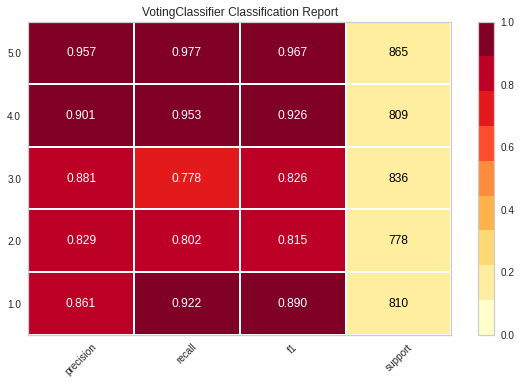

In [30]:
plot_model(blend_soft, plot = 'class_report')

In [31]:
final = finalize_model(blend_soft)

In [32]:
save_model(final, model_name='best-model')
loaded_bestmodel = load_model('best-model')

Transformation Pipeline and Model Succesfully Saved
Transformation Pipeline and Model Successfully Loaded


In [33]:
test_path = './test.csv'
t_f = pd.read_csv(test_path)
rf_pred = loaded_bestmodel.predict_proba(t_f)

In [34]:
IDs = list(range(1,rf_pred.shape[0]+1))

ID_arr = np.array(IDs).reshape(-1,1)
combine = np.concatenate((ID_arr, rf_pred), axis=1)
import pandas as pd
df = pd.DataFrame(combine, columns = ['ID','C1','C2','C3','C4','C5'])

df.to_csv('out_blend_soft.csv',index=False)